In [34]:
# !pip install seaborn
# !pip install chart-studio
# !pip install scikit-learn

  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.1/10.6 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.6 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.6 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/10.6 MB 4.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.6 MB 5.6 MB/s eta 0:00:02
   ----------- -----------

In [88]:
import os
import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [83]:
source_data_path = os.path.abspath(r'..\data\Activity Recognition')
all_data = glob(source_data_path+"/*.csv")

['d:\\Projects\\Example\\kovai\\Accelerator-Meter-Analysis\\data\\Activity Recognition\\1.csv',
 'd:\\Projects\\Example\\kovai\\Accelerator-Meter-Analysis\\data\\Activity Recognition\\10.csv',
 'd:\\Projects\\Example\\kovai\\Accelerator-Meter-Analysis\\data\\Activity Recognition\\11.csv']

In [89]:
for name in all_data:
    
    break

1


In [101]:
df = pd.DataFrame()
for name in all_data:
    df_ = pd.read_csv(name, header=None)
    df_['id'] = int(Path(name).stem)
    df = pd.concat([df, df_.iloc[:,1:]])
df.columns = ['x', 'y', 'z', 'label', 'id']
df.isnull().sum()

x        0
y        0
z        0
label    0
id       0
dtype: int64

In [102]:
print(df.label.value_counts().sort_index())
print(df.id.value_counts().sort_index())

label
0      3719
1    608667
2     47878
3    216737
4    357064
5     51498
6     47770
7    593563
Name: count, dtype: int64
id
1     162501
2     138001
3     102341
4     122201
5     160001
6     140901
7     163001
8     138001
9     166741
10    126801
11    104451
12    114702
13     67651
14    116101
15    103501
Name: count, dtype: int64


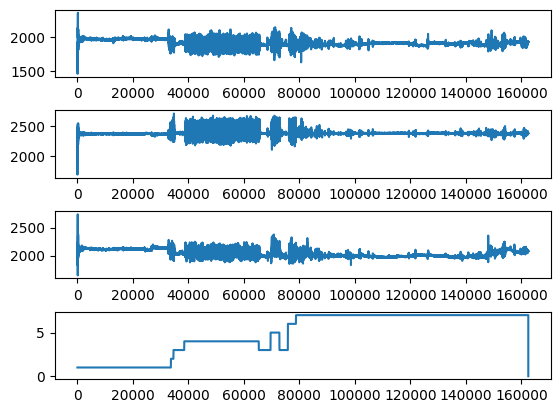

In [121]:
# plot the x, y, z acceleration and activities for a single subject
def plot_subject(subject):
    plt.figure()
    # create a plot for each column
    for t in range(subject.shape[1]):
        plt.subplot(subject.shape[1], 1, t+1)
        plt.plot(subject[:,t])
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    plt.show()
    # plot activities for a single subject
plot_subject(df[df.id==1].iloc[:,:4].values)

From the above plot we can see the Participant ID 1 performed activities in the order 1, 2, 3, 4, 3, 5, 3, 6, 7

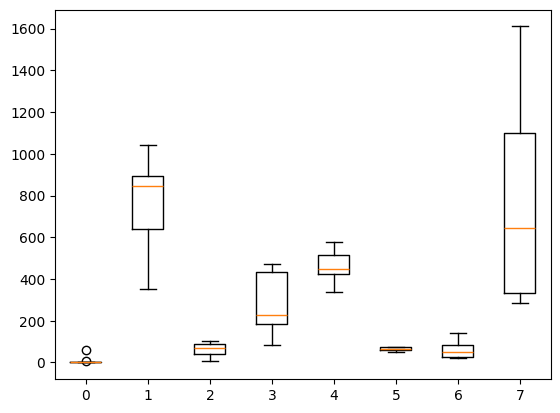

In [122]:
subjects = []
for k, df_ in df.groupby('id'):
    subjects.append(df_.iloc[:,:4].values)

# returns a list of dict, where each dict has one sequence per activity
def group_by_activity(subjects, activities):
    grouped = [{a:s[s[:,-1]==a] for a in activities} for s in subjects]
    return grouped

# calculate total duration in sec for each activity per subject and plot
def calculate_durations(grouped, activities):
# calculate the lengths for each activity for each subject
    freq = 52
    durations = [[len(s[a])/freq for s in grouped] for a in activities]
    return durations

def plot_durations(grouped, activities):
    durations = calculate_durations(grouped, activities)
    plt.boxplot(durations, labels=activities)
    plt.show()

# grouped
activities = [i for i in range(0,8)]
grouped = group_by_activity(subjects, activities)

# plot durations
plot_durations(grouped, activities)

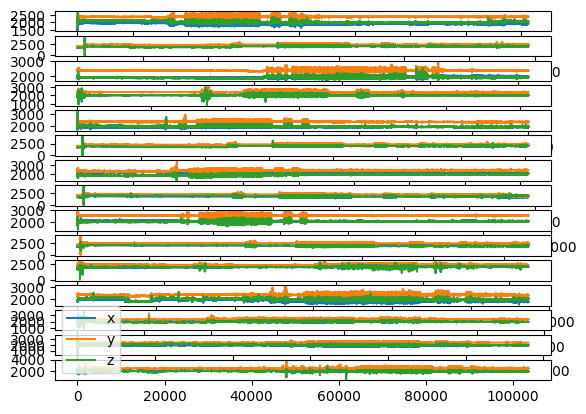

In [145]:
# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
	labels = {0:'x', 1:'y', 2:'z'}
	plt.figure()
	# create a plot for each subject
	for i in range(len(subjects)):
		plt.subplot(len(subjects), 1, i+1)
		# plot each of x, y and z
		for j in range(subjects[i].shape[1]-1):
			plt.plot(subjects[i][:,j], label=labels[j])
	plt.legend()
	plt.show()

plot_subjects(subjects)

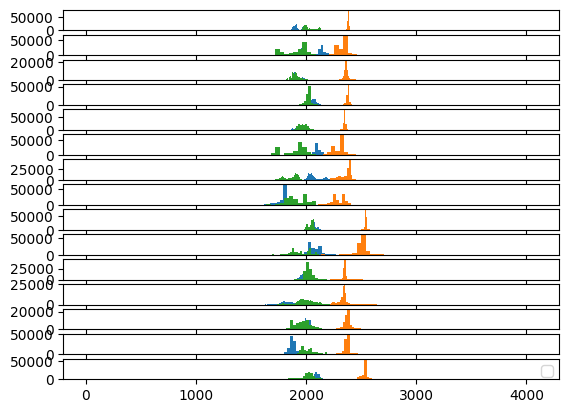

In [165]:
# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
	labels = {0:'x', 1:'y', 2:'z'}
	plt.figure()
	# create a plot for each subject
	xaxis = None
	for i in range(len(subjects)):
		ax = plt.subplot(len(subjects), 1, i+1, sharex=xaxis)
		if i == 0:
			xaxis = ax
		# plot a histogram of x data
		for j in range(subjects[i].shape[1]-1):
			plt.hist(subjects[i][:,j], bins=100, label=labels[j])
	plt.legend(loc='upper right')
	plt.show()
plot_subjects(subjects)

In [16]:
df.groupby('label').describe().T

label                   0             1             2             3  \
slno count     270.000000  44150.000000   3490.000000  23475.000000   
     mean   104558.296296  22074.500000  45894.500000  71725.594249   
     std      2044.242269  12745.151529   1007.620547  17858.801203   
     min    104300.000000      0.000000  44150.000000  47640.000000   
     25%    104370.000000  11037.250000  45022.250000  53508.500000   
     50%    104435.000000  22074.500000  45894.500000  81552.000000   
     75%    104500.000000  33111.750000  46766.750000  87420.500000   
     max    138000.000000  44149.000000  47639.000000  97199.000000   
x    count     270.000000  44150.000000   3490.000000  23475.000000   
     mean     2146.266667   1972.283964   1995.367049   2129.801278   
     std         3.499761     33.566499     46.028836     36.151610   
     min      2133.000000   1094.000000   1819.000000   1896.000000   
     25%      2144.000000   1967.000000   1973.000000   2117.000000   
     50%      2146.000000   1977.000000   1982.000000   2125.000000   
     75%      2149.000000   1982.000000   1990.000000   2146.000000   
     max      2157.000000   3625.000000   2396.000000   2369.000000   
y    count     270.000000  44150.000000   3490.000000  23475.000000   
     mean     2338.322222   2289.038686   2300.997708   2349.592716   
     std         3.035702     85.556126     38.886891     43.500039   
     min      2324.000000      2.000000   2177.000000   2126.000000   
     25%      2336.250000   2277.000000   2282.000000   2342.000000   
     50%      2338.000000   2284.000000   2287.000000   2349.000000   
     75%      2340.000000   2340.000000   2295.000000   2355.000000   
     max      2347.000000   4094.000000   2536.000000   2843.000000   
z    count     270.000000  44150.000000   3490.000000  23475.000000   
     mean     1952.381481   1790.402424   1799.596562   1979.401917   
     std         5.156188     78.530171     88.507820     36.323292   
     min      1939.000000      2.000000   1694.000000   1728.000000   
     25%      1948.250000   1754.000000   1756.000000   1967.000000   
     50%      1952.500000   1762.000000   1762.000000   1974.000000   
     75%      1956.000000   1843.000000   1771.750000   1982.000000   
     max      1975.000000   4094.000000   2214.000000   2201.000000   

label                  4             5              6              7  
slno count  22175.000000   3910.000000    7100.000000   33431.000000  
     mean   69632.000000  92394.500000  100749.500000  121284.000179  
     std     6401.515446   1128.864105    2049.740965    9650.843564  
     min    58545.000000  90440.000000   97200.000000  104570.000000  
     25%    64088.500000  91417.250000   98974.750000  112930.000000  
     50%    69632.000000  92394.500000  100750.000000  121280.000000  
     75%    75175.500000  93371.750000  102520.000000  129640.000000  
     max    80719.000000  94349.000000  104300.000000  138000.000000  
x    count  22175.000000   3910.000000    7100.000000   33431.000000  
     mean    2132.974927   2141.752430    2150.119296    2146.734169  
     std       73.258145     45.496849      17.439320      32.538732  
     min     1808.000000   1949.000000    2038.000000    1906.000000  
     25%     2083.000000   2144.000000    2143.000000    2131.000000  
     50%     2127.000000   2147.000000    2148.000000    2147.000000  
     75%     2185.000000   2150.000000    2154.000000    2165.000000  
     max     2539.000000   2344.000000    2228.000000    2403.000000  
y    count  22175.000000   3910.000000    7100.000000   33431.000000  
     mean    2349.064487   2345.804859    2339.820282    2341.188149  
     std       98.551565     61.764015      13.373558      31.516154  
     min     1874.000000   2125.000000    2285.000000    2102.000000  
     25%     2280.000000   2339.000000    2334.000000    2327.500000  
     50%     2350.000000   2343.000000    2341.000000    2340.000000  
     75%     2405.00000

<Axes: ylabel='x'>

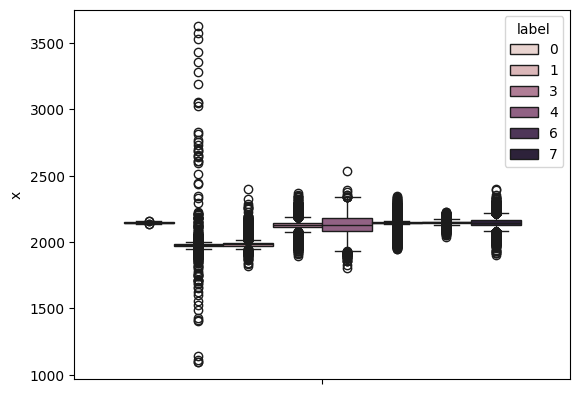

In [17]:
sns.boxplot(y=df['x'], hue=df['label'])

<Axes: ylabel='y'>

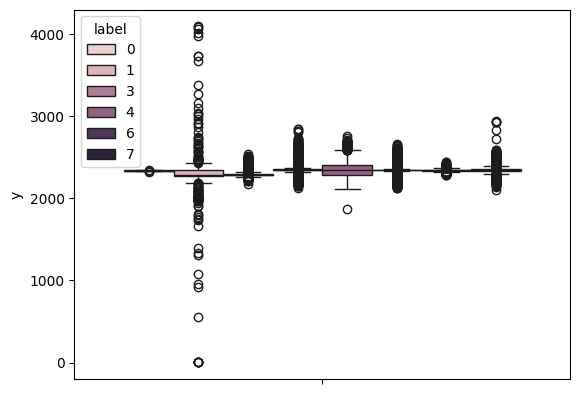

In [18]:
sns.boxplot(y=df['y'], hue=df['label'])

<Axes: xlabel='z'>

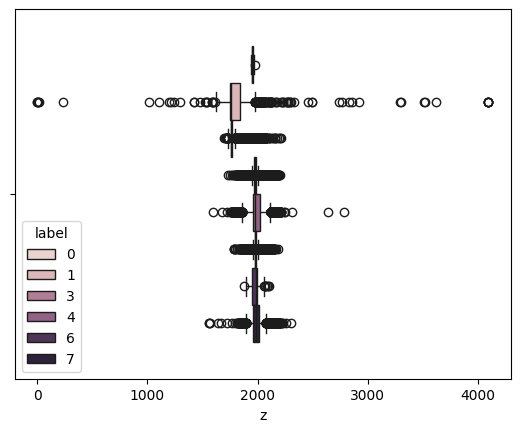

In [19]:
sns.boxplot(x=df['z'], hue=df['label'])

d:\Projects\Example\venv\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


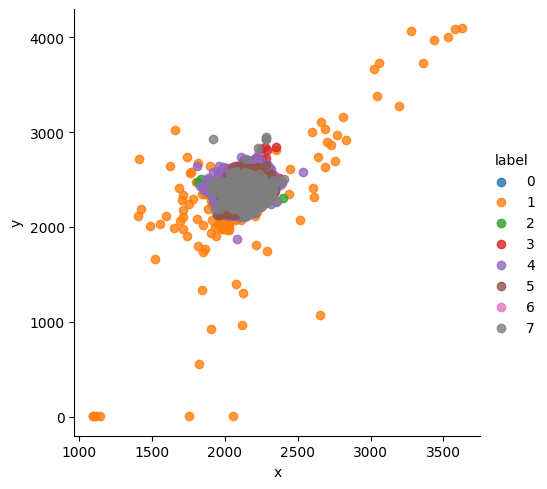

In [20]:
facet_xy = sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

d:\Projects\Example\venv\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


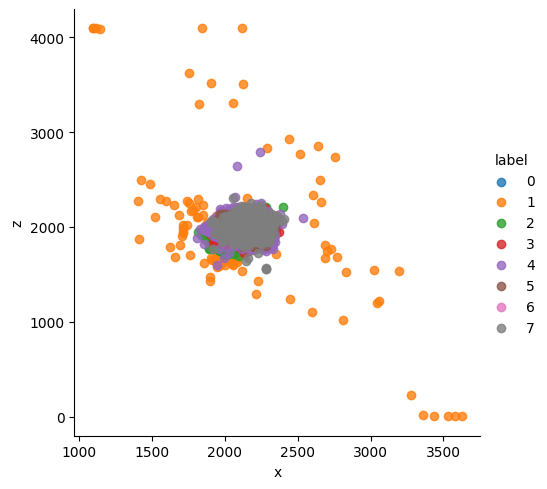

In [21]:
facet_xz = sns.lmplot(data=df, x='x', y='z', hue='label', fit_reg=False, legend=True, legend_out=True)

d:\Projects\Example\venv\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


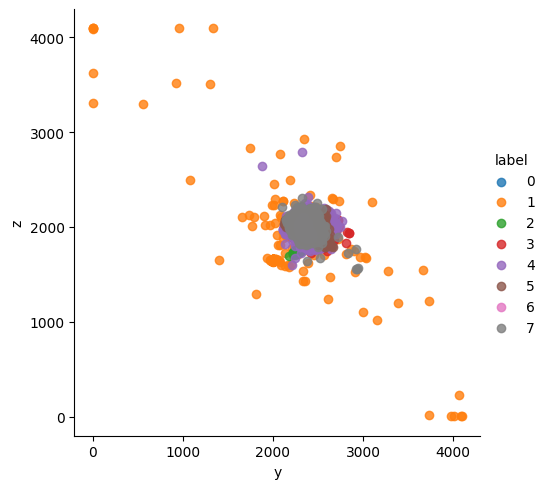

In [22]:
facet_yz = sns.lmplot(data=df, x='y', y='z', hue='label', fit_reg=False, legend=True, legend_out=True)

<Axes: xlabel='x', ylabel='y'>

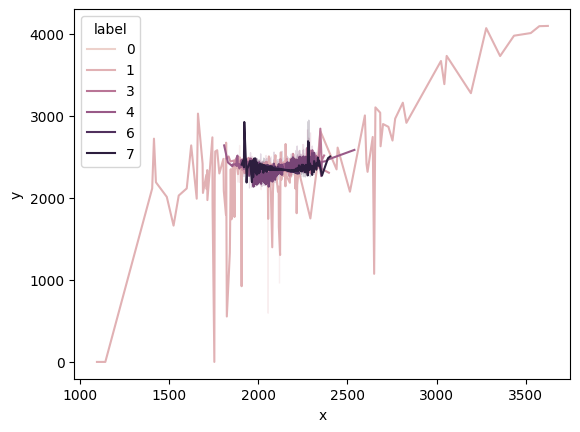

In [23]:
sns.lineplot(x=df['x'], y=df['y'], hue=df['label'])

<Axes: xlabel='x', ylabel='z'>

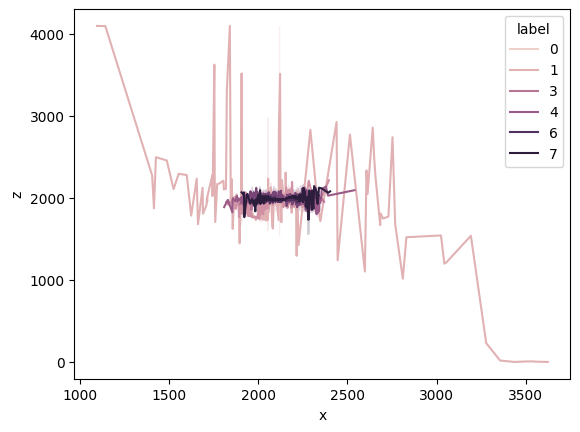

In [24]:
sns.lineplot(x=df['x'], y=df['z'], hue=df['label'])

KeyboardInterrupt: 

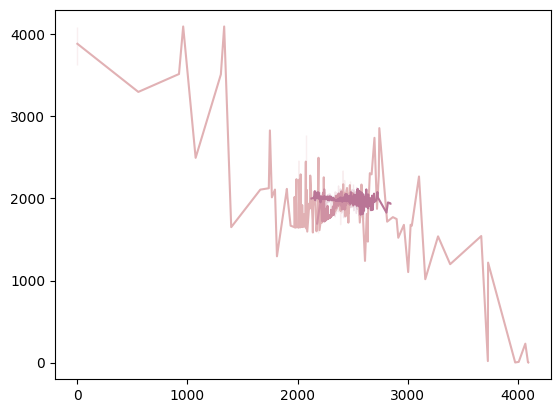

In [25]:
sns.lineplot(x=df['y'], y=df['z'], hue=df['label'])

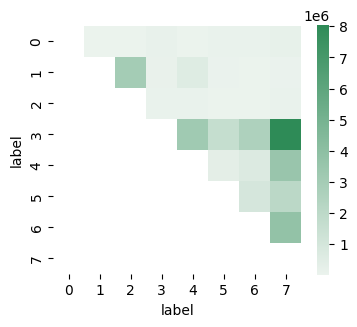

In [26]:
ct = pd.crosstab(df['x'], df['label'])
co_occurrence = ct.T.dot(ct)
np.fill_diagonal(co_occurrence.to_numpy(), 0)

f, ax = plt.subplots(figsize=(4, 5))
mask = np.tril(np.ones_like(co_occurrence))

cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(co_occurrence, mask=mask, cmap=cmap, square=True, cbar_kws={"shrink": .65})
plt.show()

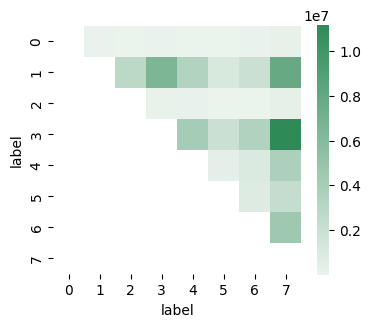

In [27]:
ct = pd.crosstab(df['y'], df['label'])
co_occurrence = ct.T.dot(ct)
np.fill_diagonal(co_occurrence.to_numpy(), 0)

f, ax = plt.subplots(figsize=(4, 5))
mask = np.tril(np.ones_like(co_occurrence))

cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(co_occurrence, mask=mask, cmap=cmap, square=True, cbar_kws={"shrink": .65})
plt.show()

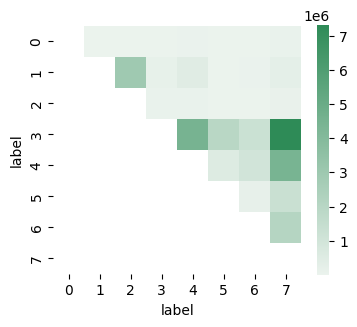

In [28]:
ct = pd.crosstab(df['z'], df['label'])
co_occurrence = ct.T.dot(ct)
np.fill_diagonal(co_occurrence.to_numpy(), 0)

f, ax = plt.subplots(figsize=(4, 5))
mask = np.tril(np.ones_like(co_occurrence))

cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(co_occurrence, mask=mask, cmap=cmap, square=True, cbar_kws={"shrink": .65})
plt.show()

In [30]:
df.groupby('label').apply(lambda df_new: df_new['x'].corr(df_new['y']))

label
0   -0.069701
1    0.031475
2    0.464055
3    0.231436
4    0.326360
5    0.456984
6   -0.504242
7   -0.125370
dtype: float64

In [31]:
df.groupby('label').apply(lambda df_new: df_new['x'].corr(df_new['z']))

label
0    0.021535
1   -0.568088
2    0.740518
3   -0.011146
4   -0.305348
5   -0.200012
6    0.084219
7    0.183034
dtype: float64

In [32]:
df.groupby('label').apply(lambda df_new: df_new['y'].corr(df_new['z']))

label
0    0.008268
1    0.395648
2    0.778623
3   -0.101094
4    0.039195
5   -0.216517
6    0.038338
7   -0.203420
dtype: float64

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, init='k-means++')
kmeans.fit(df_scaled_new[['x', 'y', 'z']])

KMeans()

In [55]:
kmeans.inertia_

59377.22105362673

In [56]:
pred = kmeans.predict(df_scaled_new[['x', 'y', 'z']])

In [57]:
df_scaled_new['cluster'] = pred

In [80]:
df_scaled_new.loc[df_scaled_new['label']==2].cluster.value_counts()

cluster
0    2875
6     284
1     163
2     114
5      36
3      18
Name: count, dtype: int64

In [81]:
df_scaled_new.loc[df_scaled_new['cluster']==0].label.value_counts()

label
1    28288
2     2875
4        6
7        3
3        1
Name: count, dtype: int64